In [1]:
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sb
import random

In [3]:
hip = pd.read_csv("Final_Data/Hip.csv")
wrist = pd.read_csv("Final_Data/Wrist.csv")
thigh = pd.read_csv("Final_Data/Thigh.csv")
chest = pd.read_csv("Final_Data/Chest.csv")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (104) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Plotting Functions

Description: plots all of the data in the dataset by Mean Vector Magnitude into 5 separate plots, and colors by the column you specify.


data - dataset (hip, wrist, thigh, or chest)


data_label - sensor you are using as a string for the title of the graph ("Hip", "Wrist", "Thigh", or "Chest")


column - activity encoding you are using as a string ("broad_activity", "detailed_activity", "updated_final_activity")


column_label - activity encoding string for use in title of graph ("Broad Activity", "Detailed Activity", "Final Activity")


folder - folder to save the graphs in (if you want to save the graph, edit the line specified in the function to come up with you own naming schema)

In [4]:
def plot_all_data(data, data_label, column, column_label, folder):
    unique_behaviors = np.unique(data[column])
    colors = cm.rainbow(np.linspace(0, 1, len(unique_behaviors)))
    color_dict = dict(zip(unique_behaviors, colors))
    data = data.reset_index(drop = True)
    data1 = data.groupby([data.index // 5, column], as_index = False).count()
    data1['index'] = data1.index
    data2 = pd.DataFrame(data.groupby([data.index // 5, column], as_index=False).mean())
    print(data2.shape[0], len(list(data1[column])))
    if data2.shape[0] != len(list(data1[column])):
        data2 = data2.iloc[:data2.shape[0]-1,:]
    data2['index'] = data2.index
    data3 = data2[['index', column, 'mean.vm']]
    data3['color'] = [color_dict[behavior] for behavior in data3[column]]
    split = int(data3.shape[0]/5)
    data4 = pd.DataFrame(data2.iloc[:split,:])
    data5 = pd.DataFrame(data2.iloc[split:2*split,:])
    data6 = pd.DataFrame(data2.iloc[2*split:3*split,:])
    data7 = pd.DataFrame(data2.iloc[3*split:4*split,:])
    data8 = pd.DataFrame(data2.iloc[4*split:,:])
    datasets = [data4,data5,data6,data7,data8]
    for i in range(len(datasets)):
        data = datasets[i]
        plt.subplots(figsize=(70,15))
        for behavior in np.unique(data[column]):
            dat = data.copy()
            dat.loc[dat[column] != behavior, "mean.vm"] = None
            if len(np.unique(dat["mean.vm"])) > 1:
                plt.plot(dat["index"],
                         dat["mean.vm"],
                         label = behavior, color = color_dict[behavior])
        plt.ylim(top = 2.5)
        plt.title("Mean Vector Magnitude by " + column_label +" - " + data_label, fontsize=40)
        plt.legend(loc = 'upper right', fontsize = 20) 
        # To change the naming schema edit the line below
        plt.savefig(folder + "/" + data_label.lower() + "_updated_final_activity_graph_" + str(i+1) + ".jpg") 
    
    pd.DataFrame(data.groupby([data.index // 5, column], as_index=False).mean())

69474 69474


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


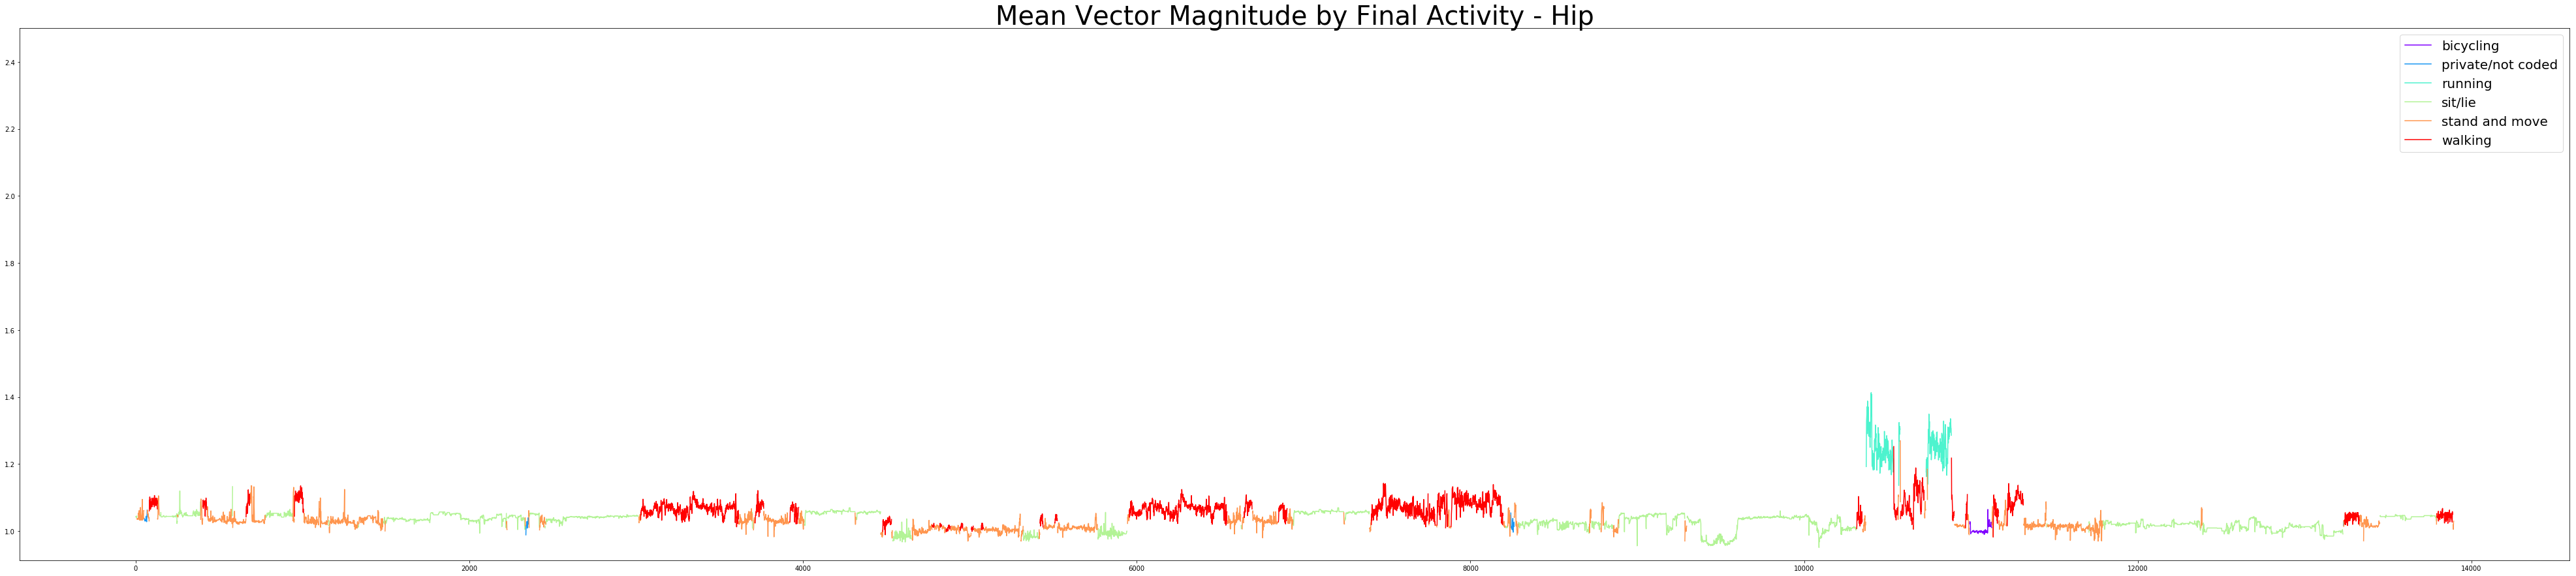

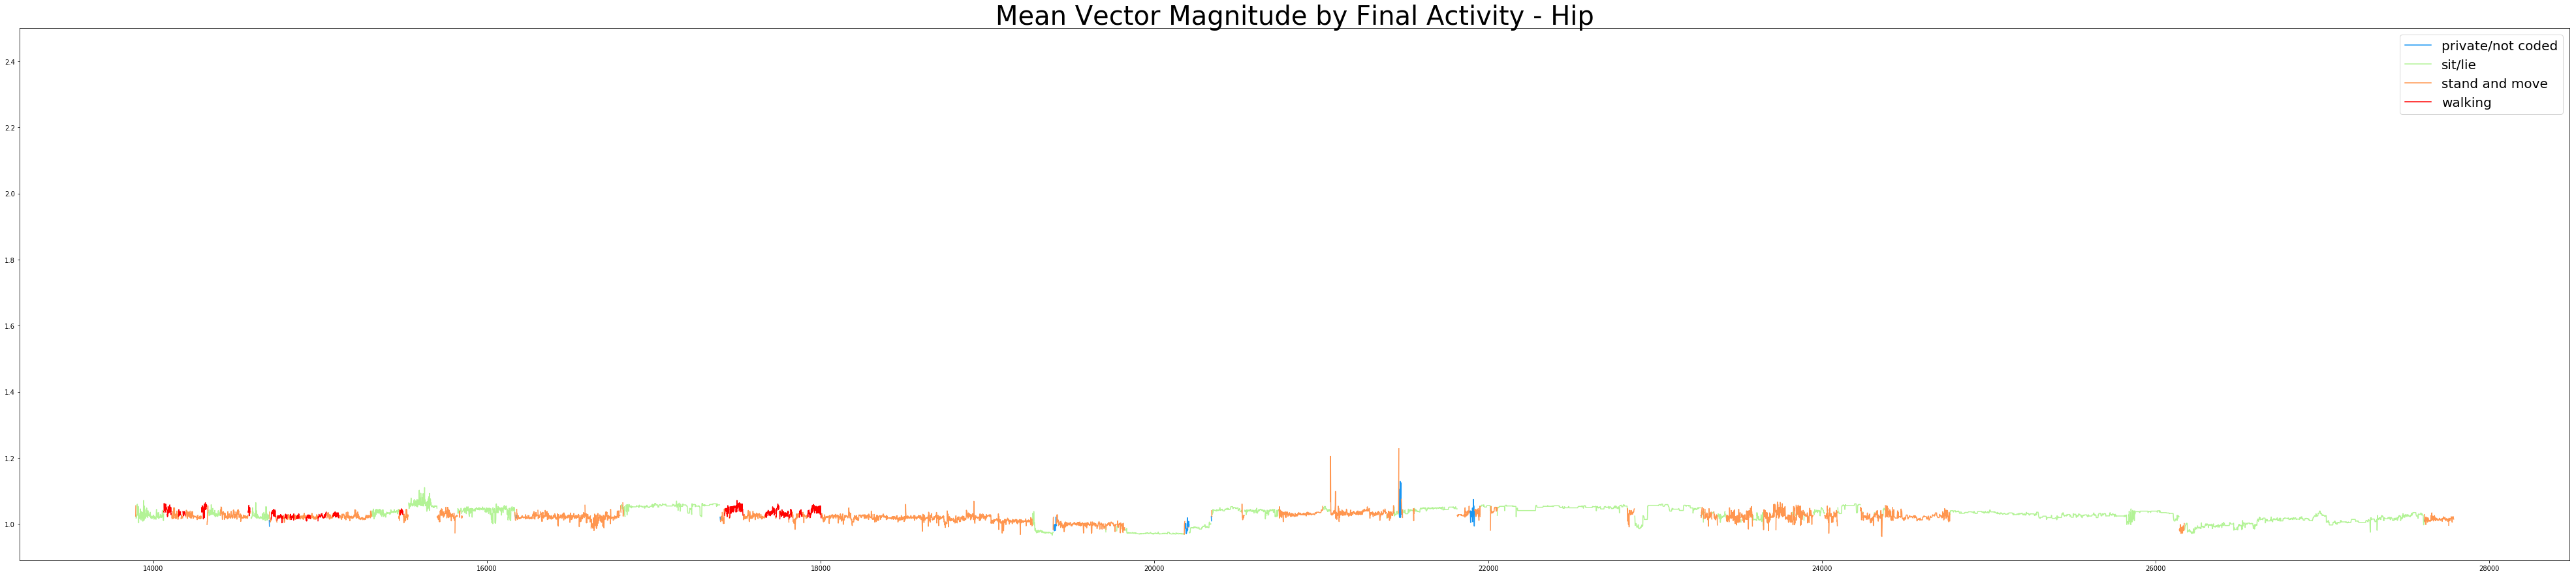

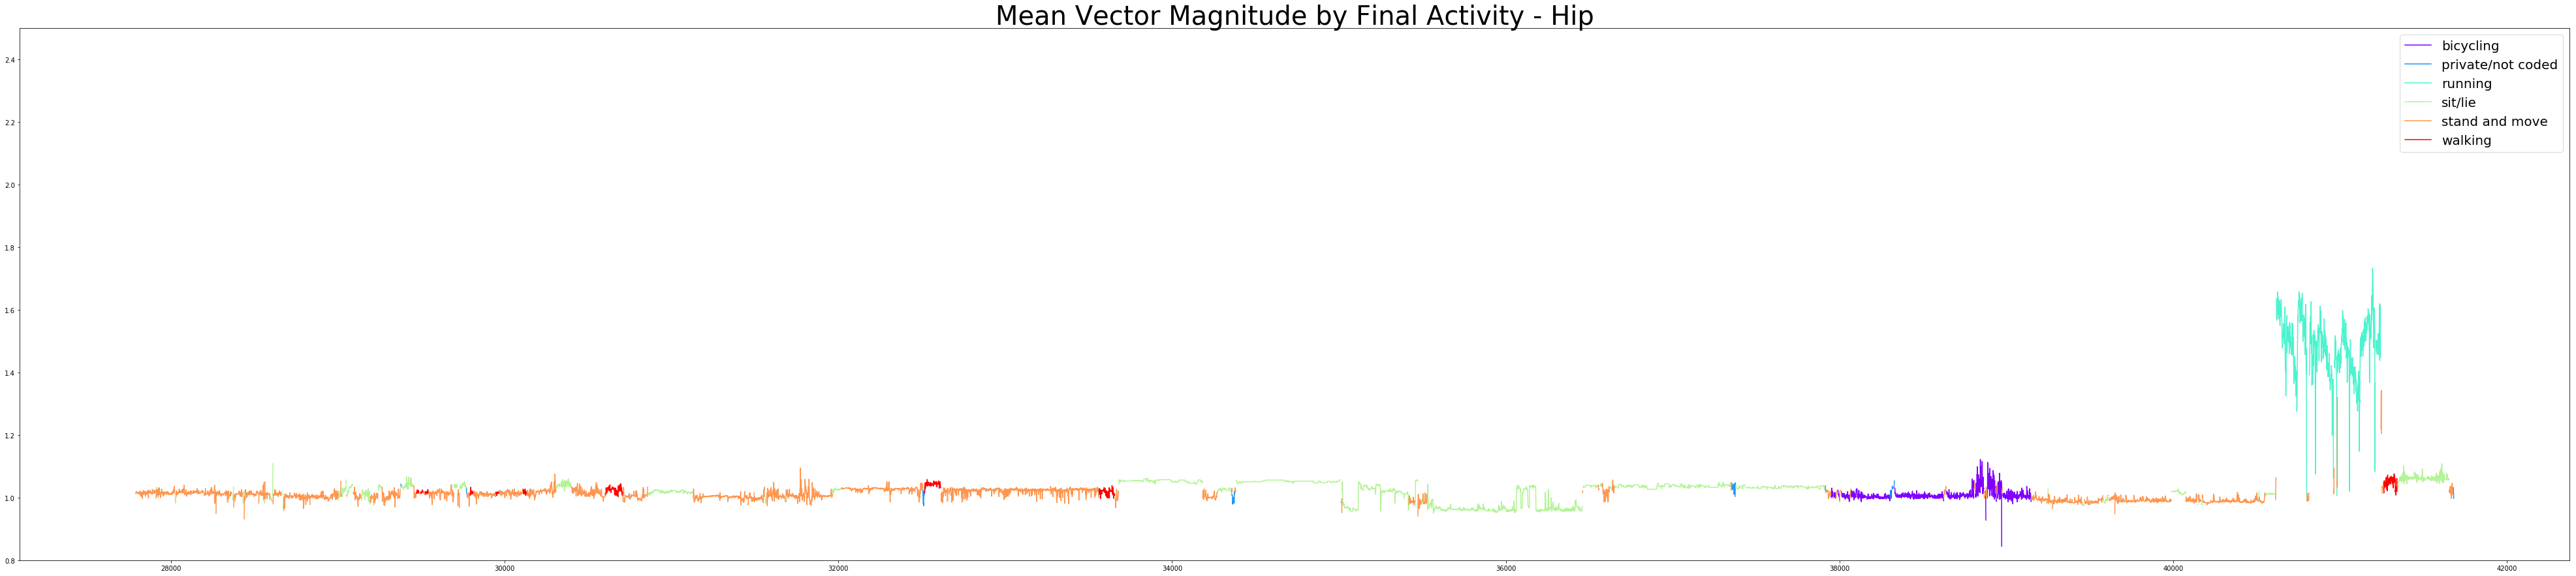

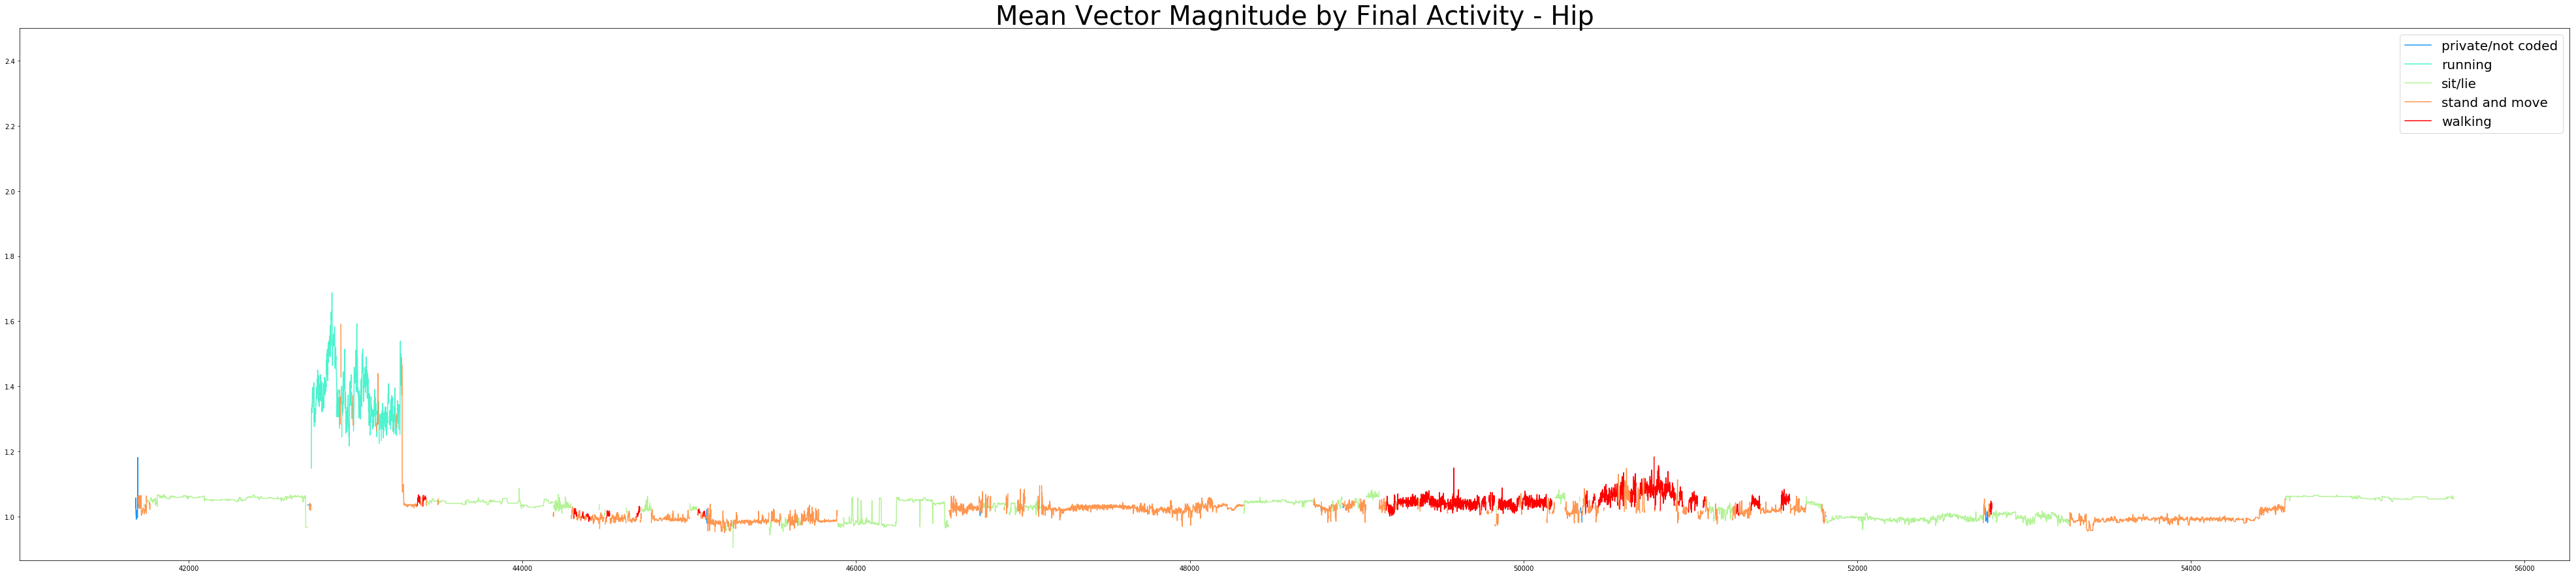

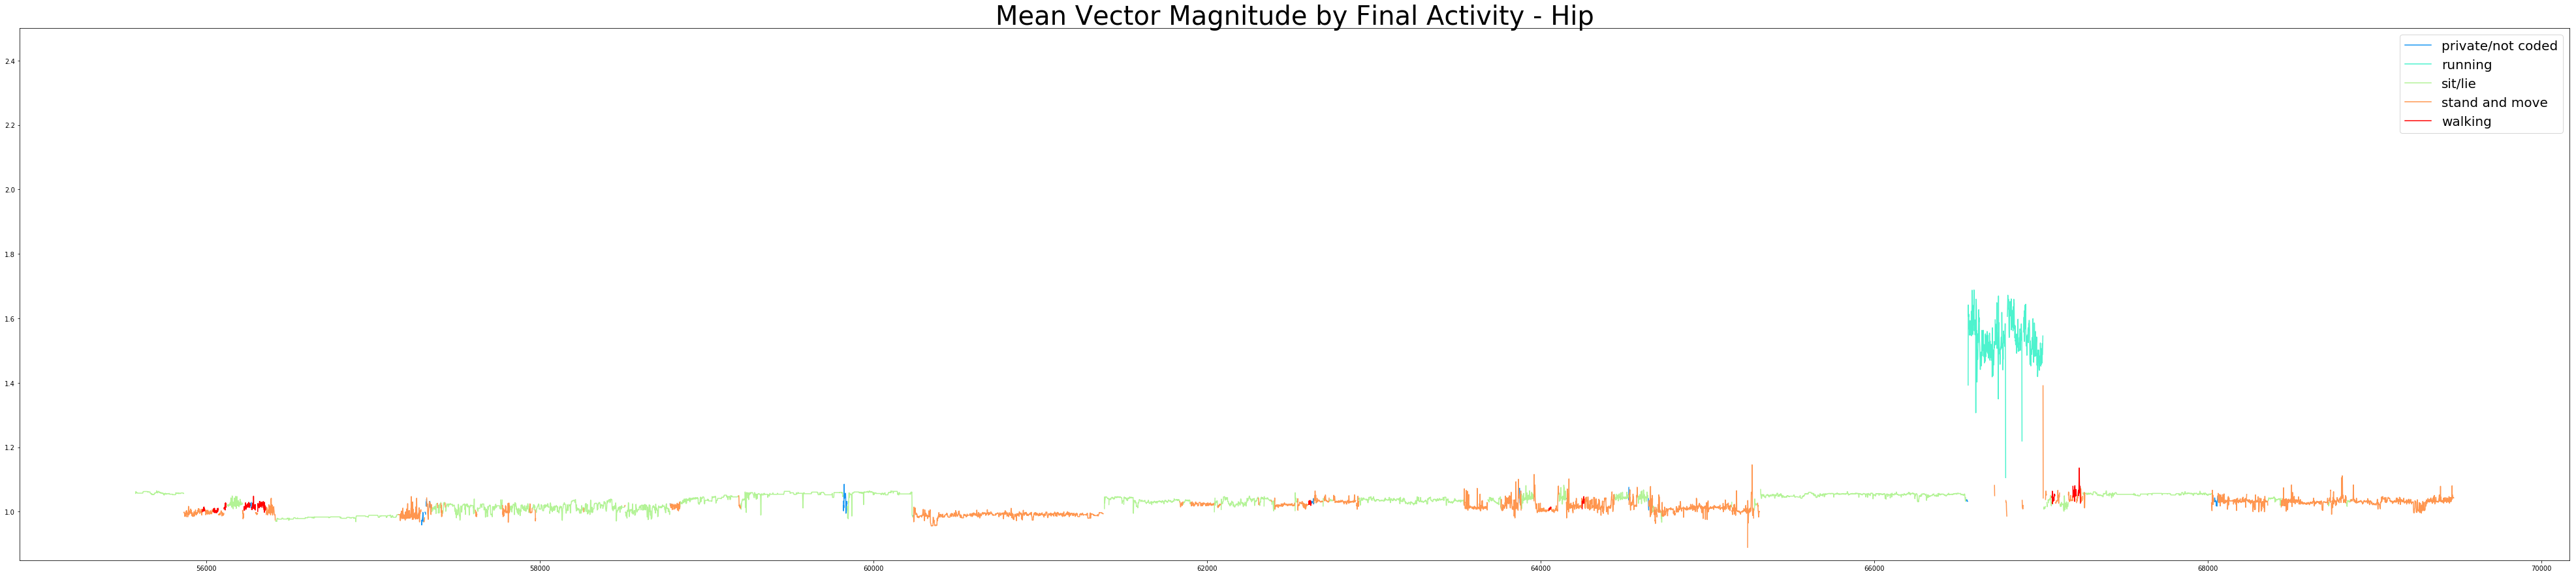

In [7]:
plot_all_data(hip, "Hip", "updated_final_activity", "Final Activity", "UpdatedFinalActivityGraphs")

69474 69474


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


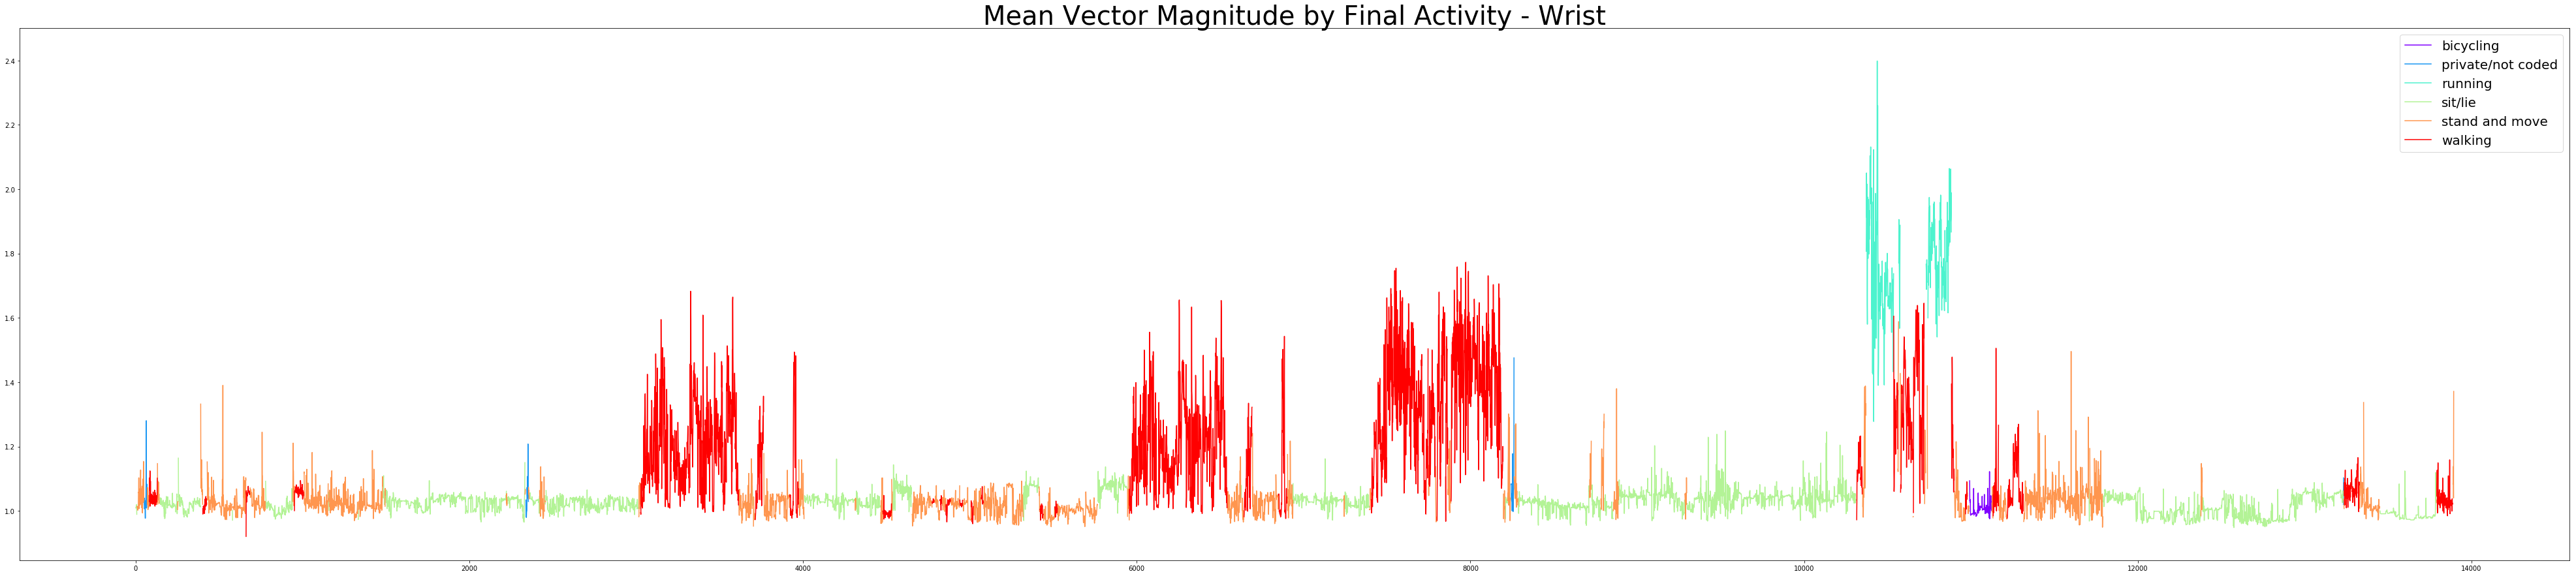

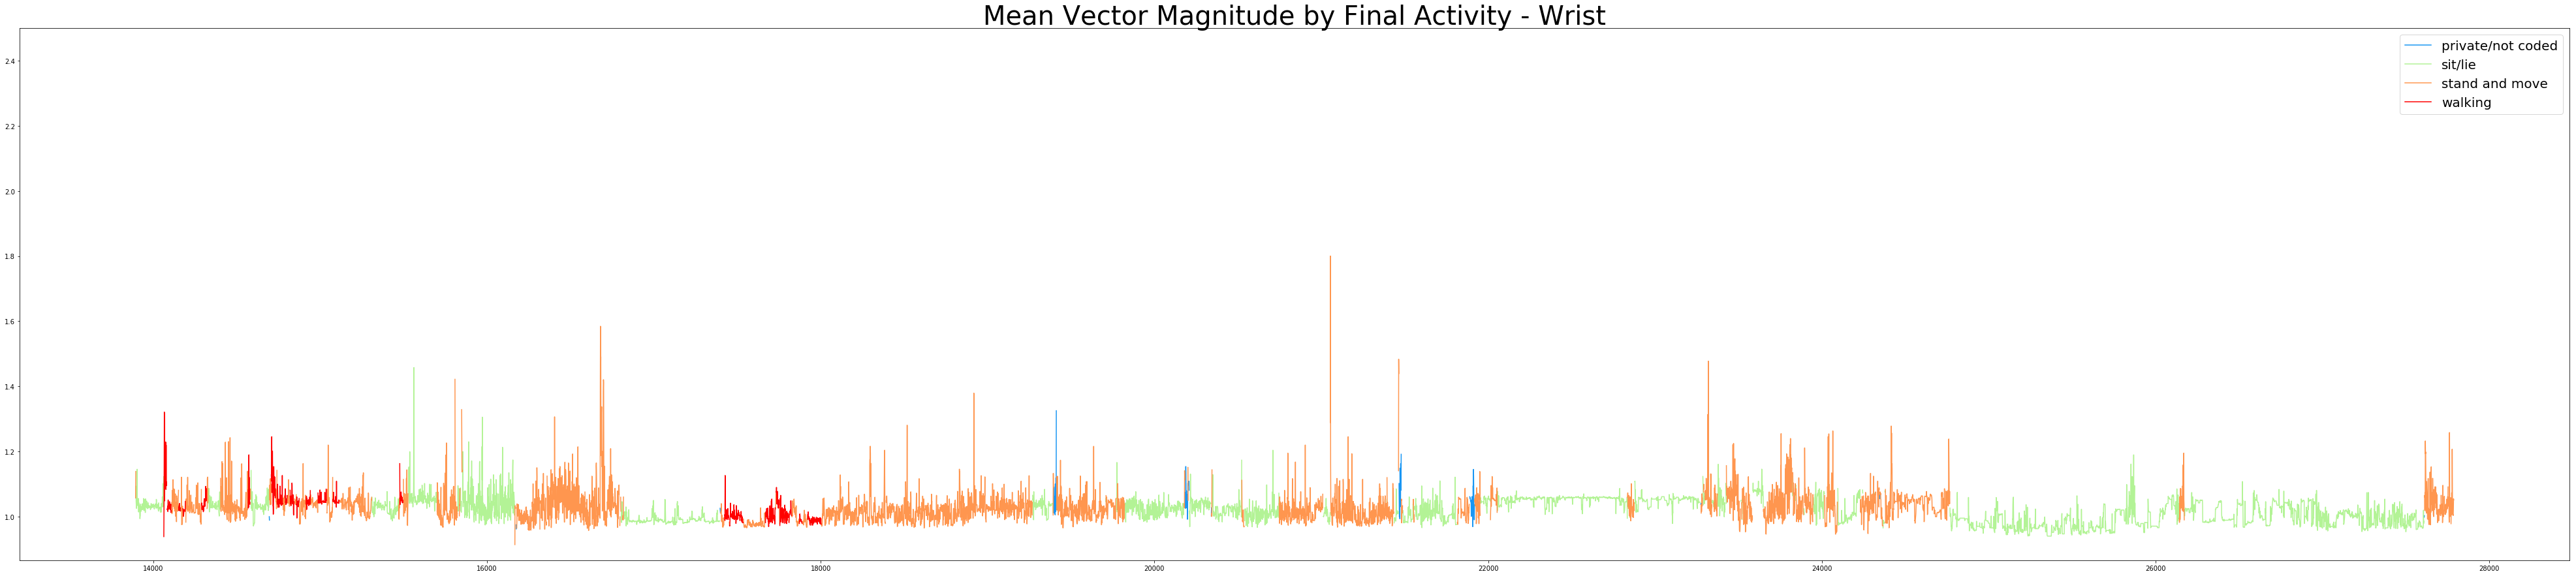

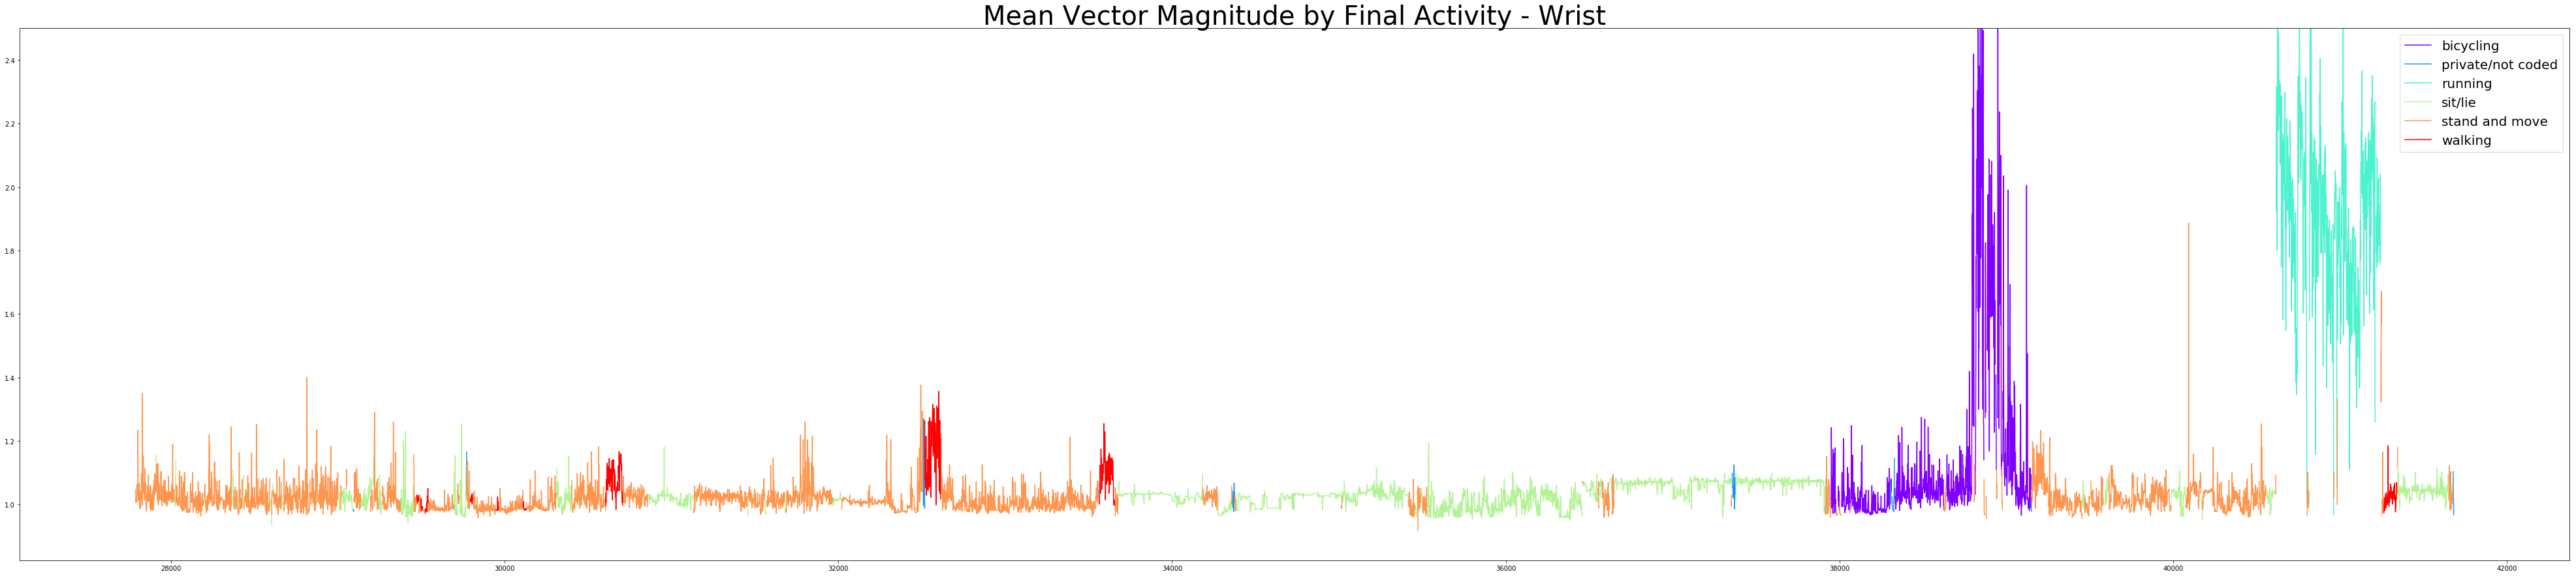

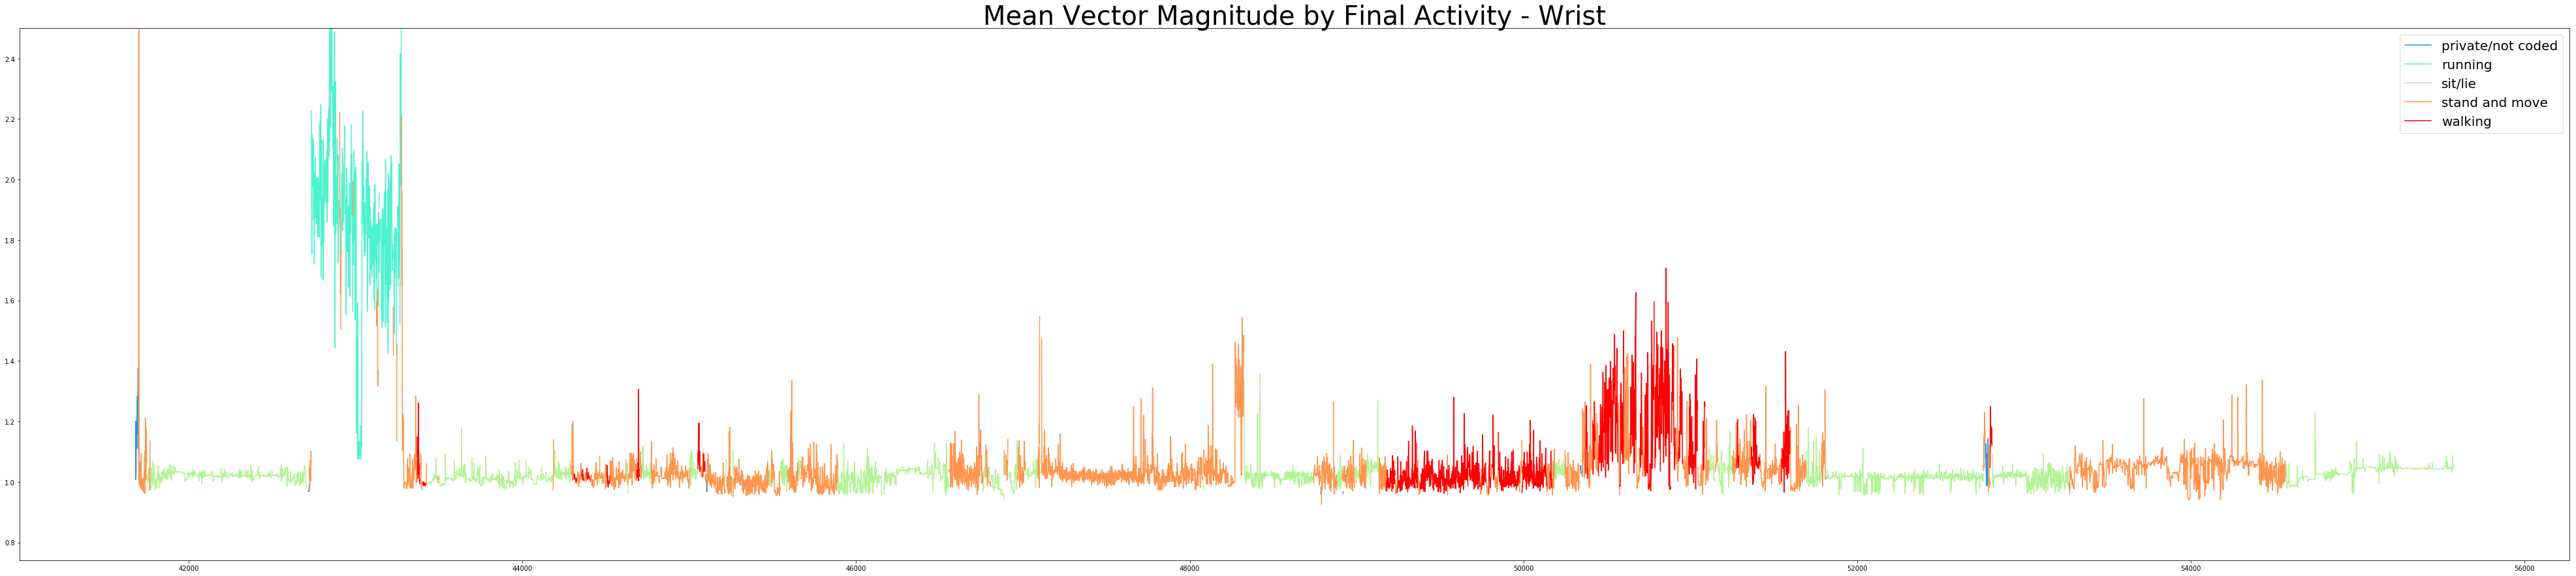

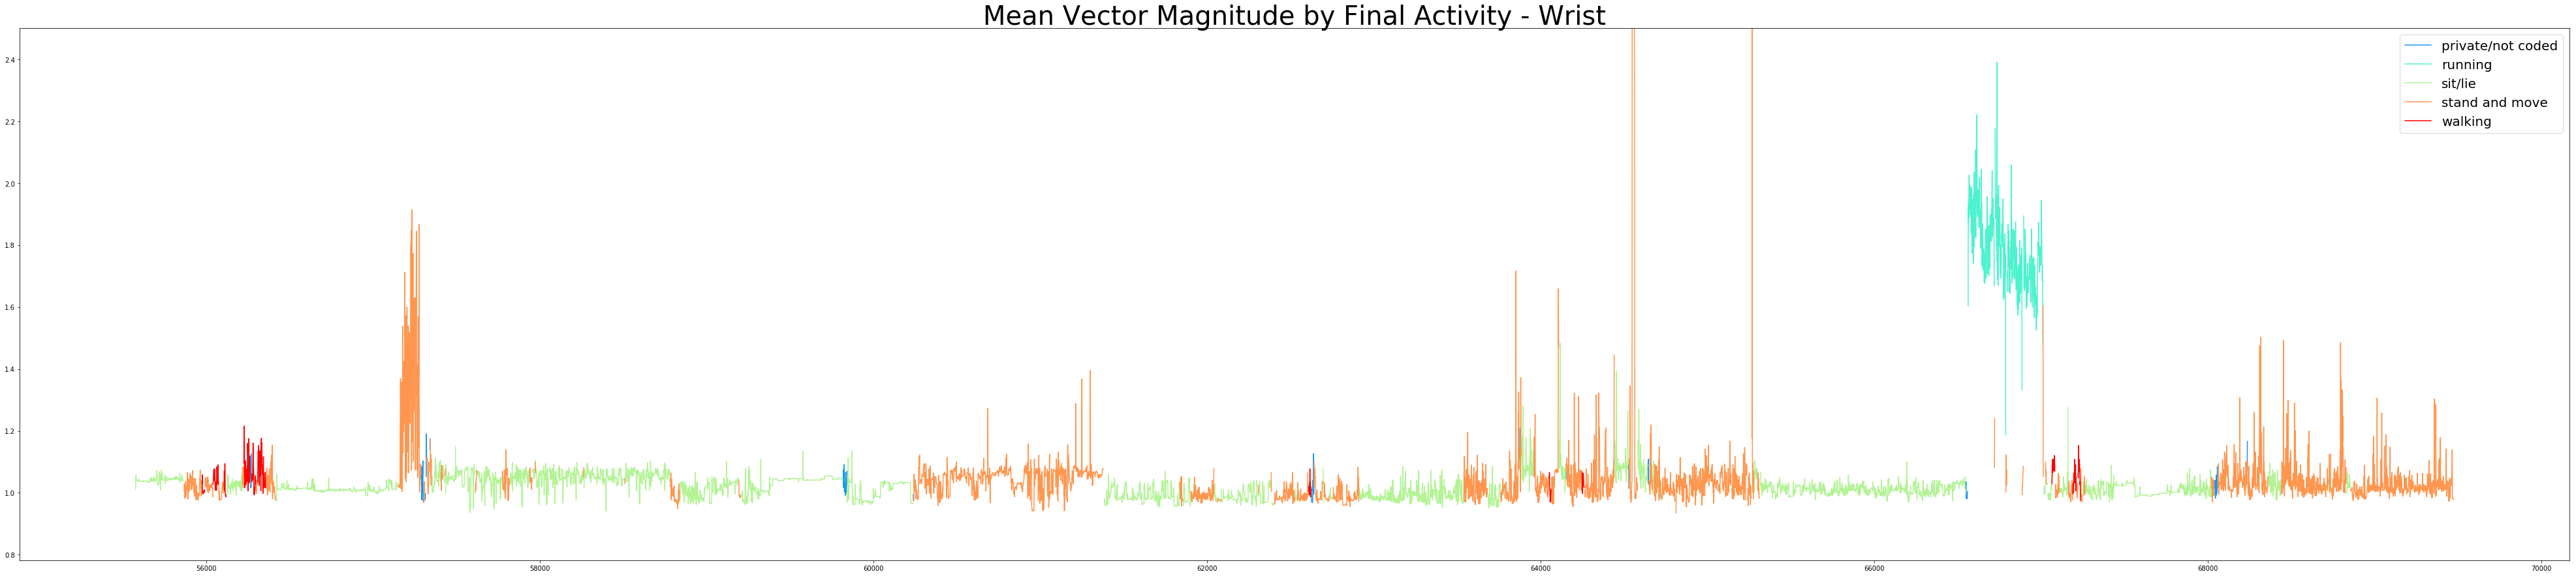

In [8]:
plot_all_data(wrist, "Wrist", "updated_final_activity", "Final Activity", "UpdatedFinalActivityGraphs")

73713 73713


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


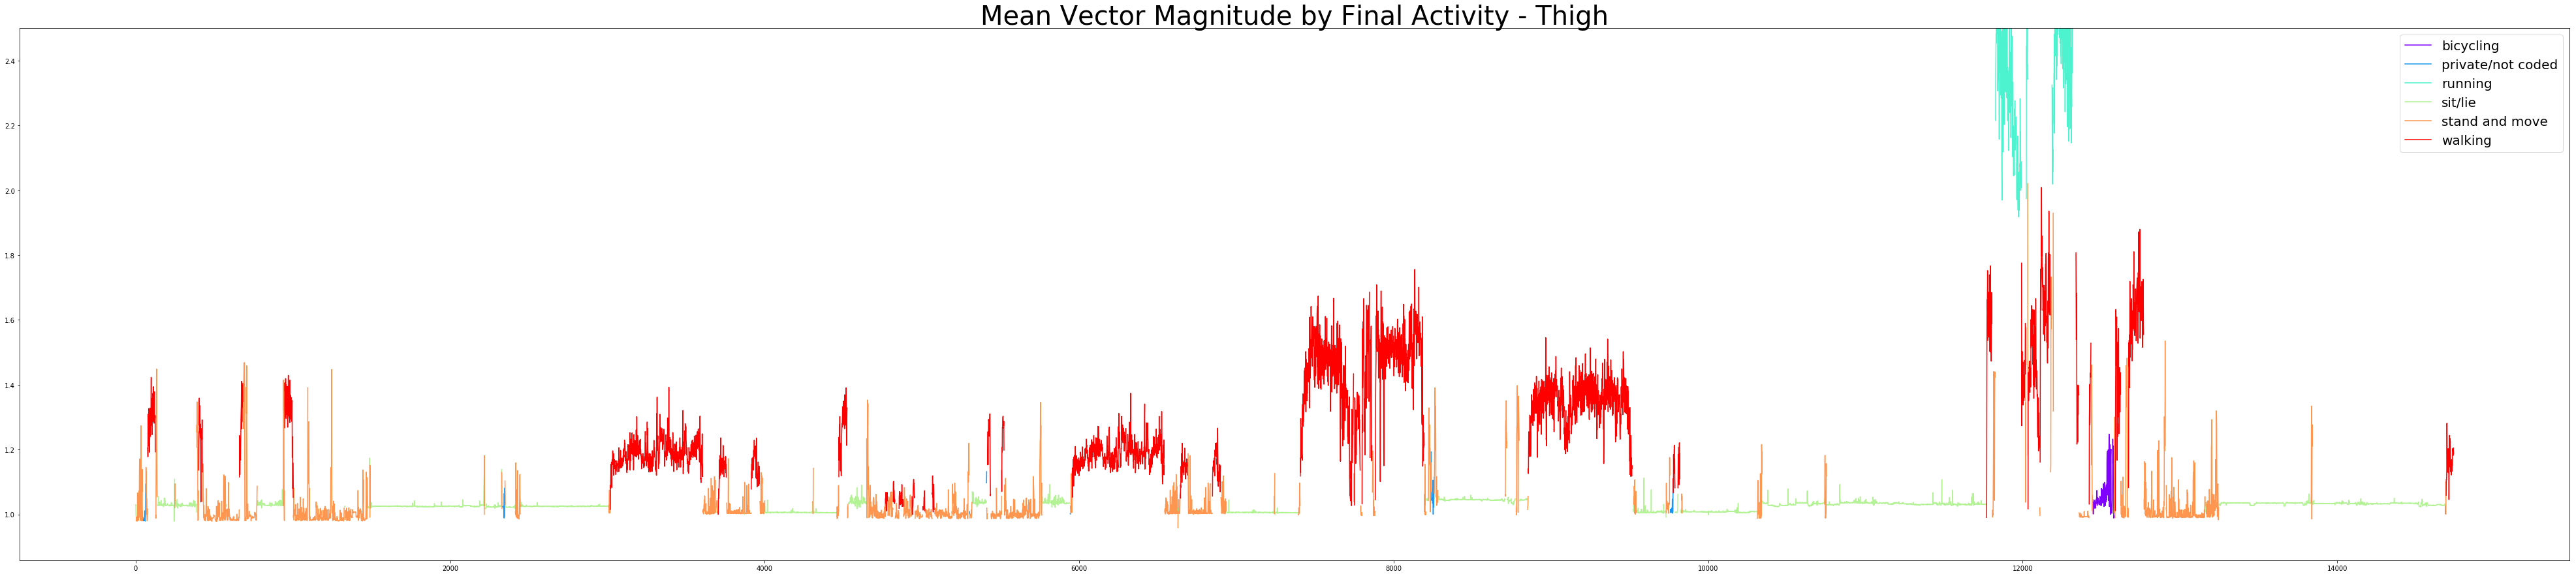

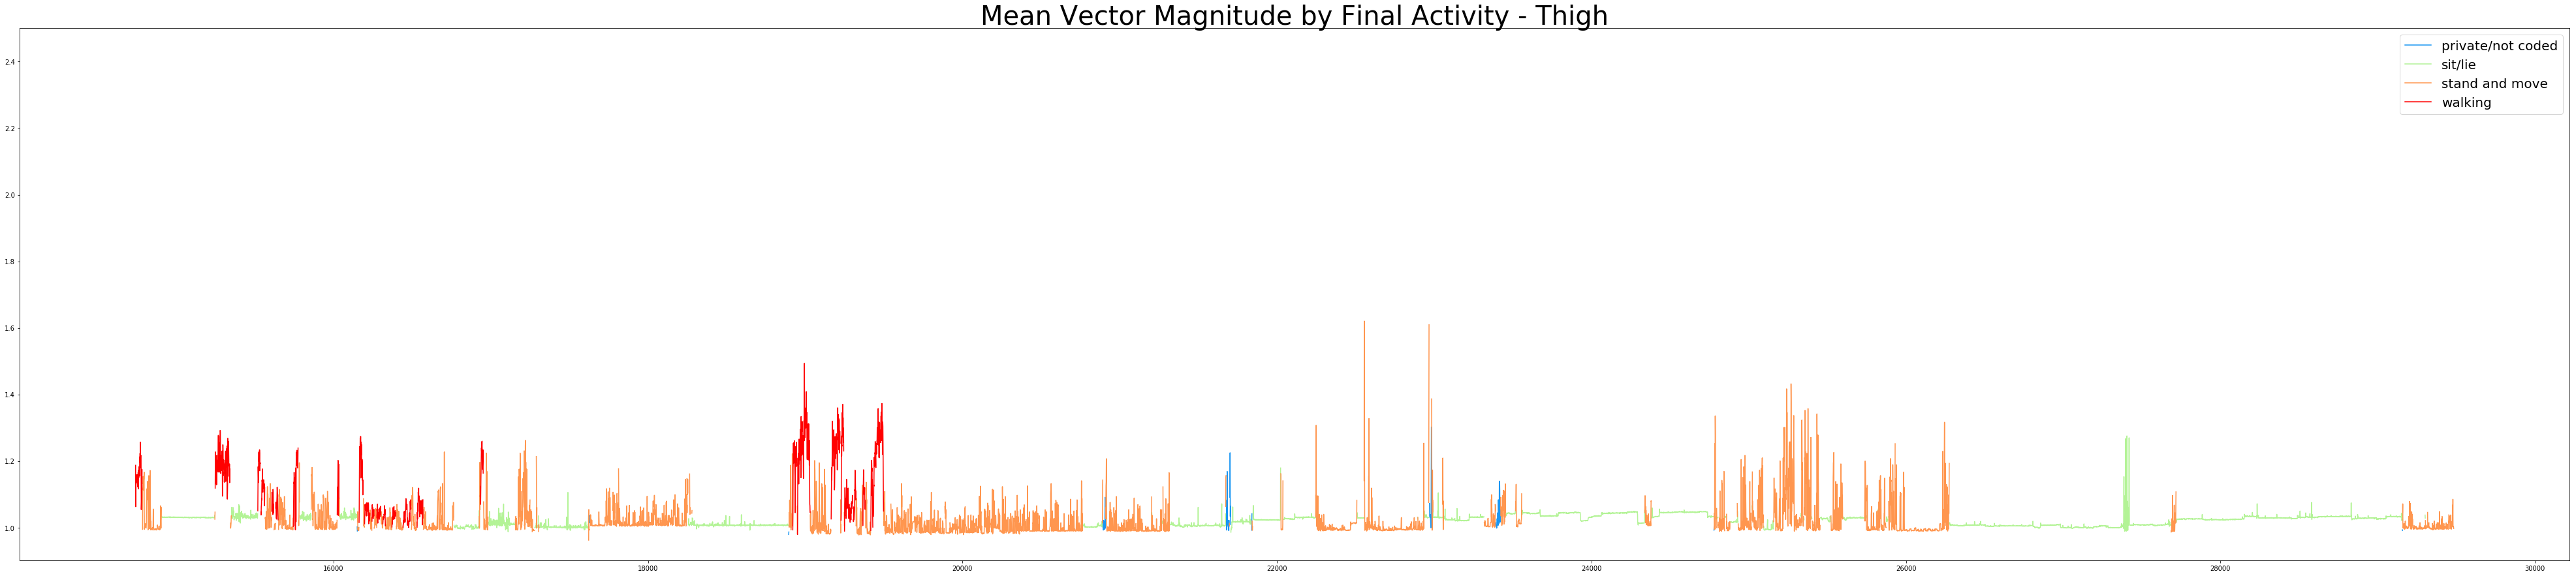

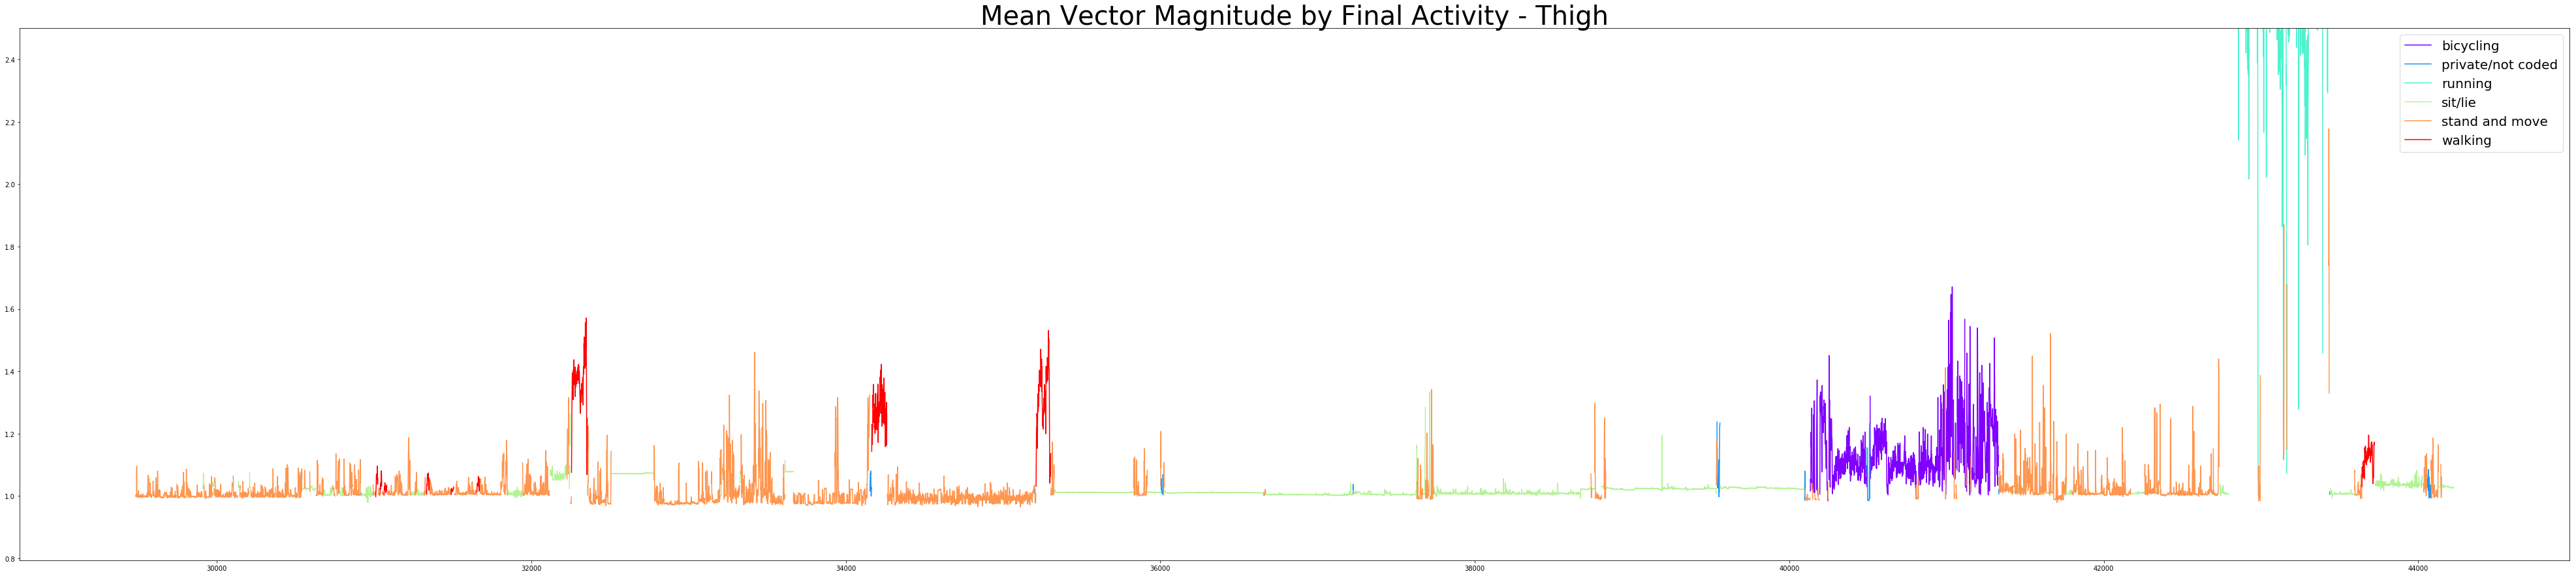

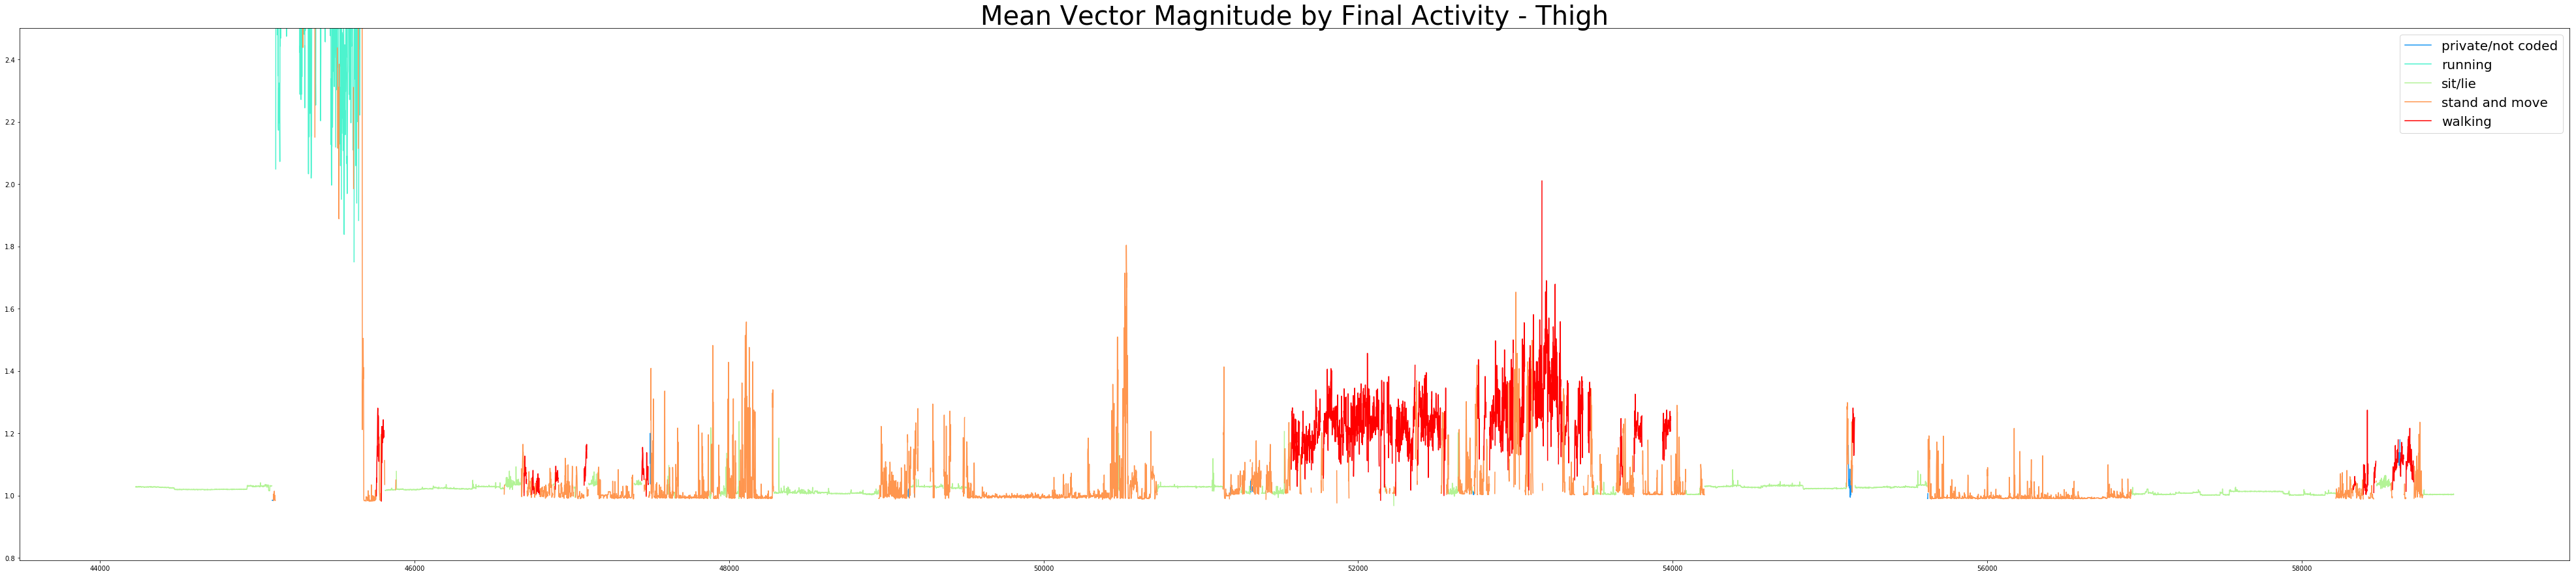

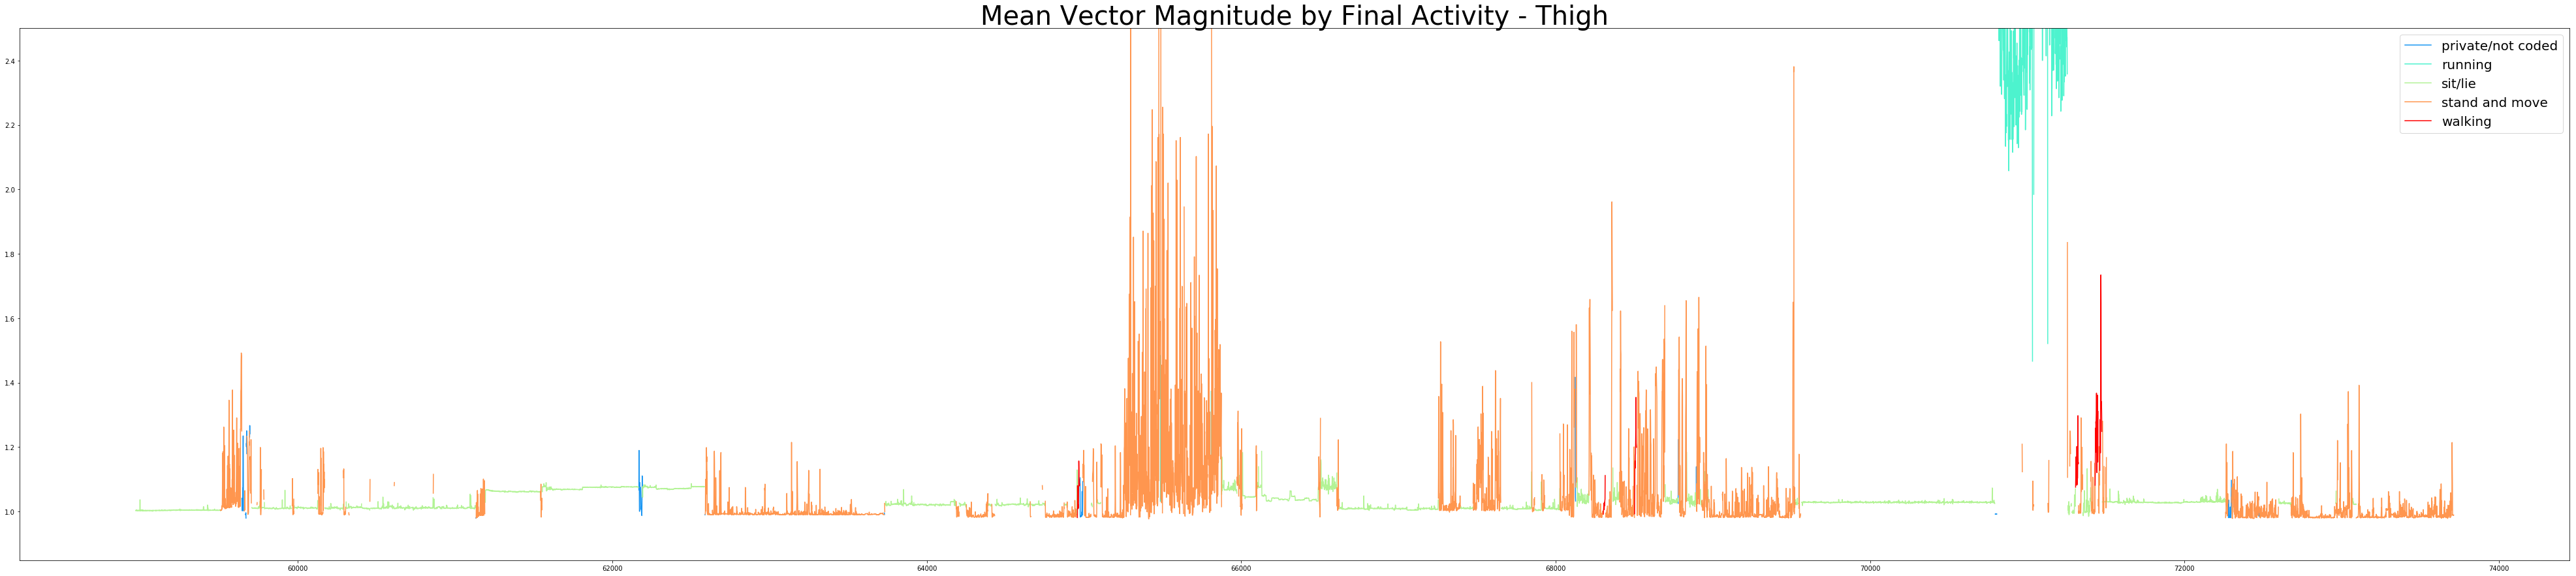

In [9]:
plot_all_data(thigh, "Thigh", "updated_final_activity", "Final Activity", "UpdatedFinalActivityGraphs")

73771 73771


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


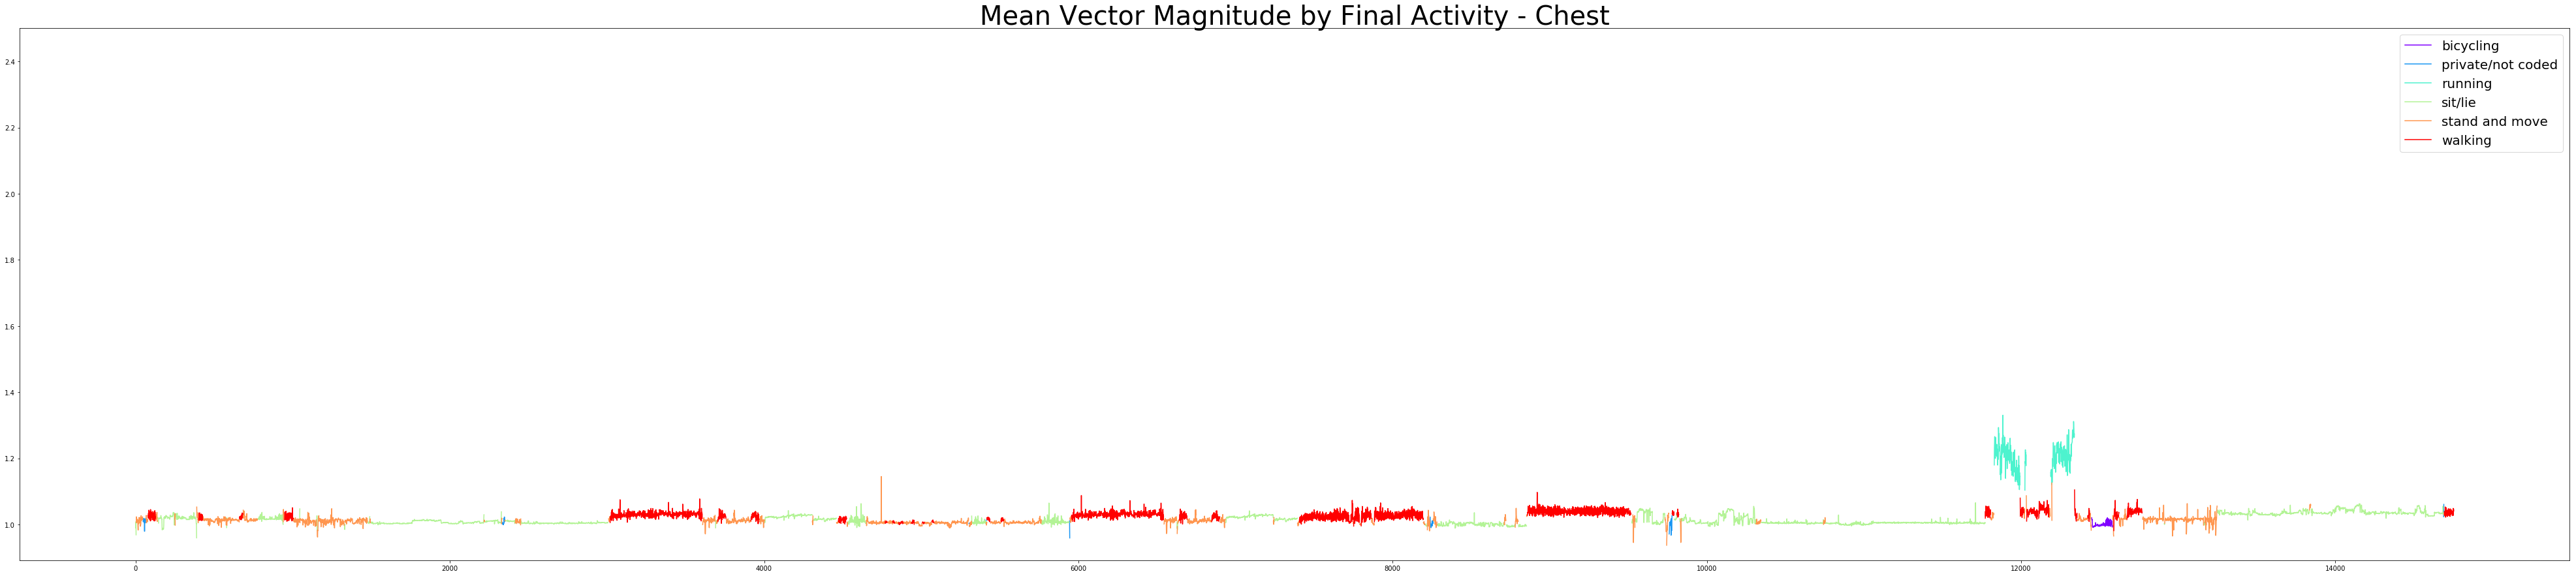

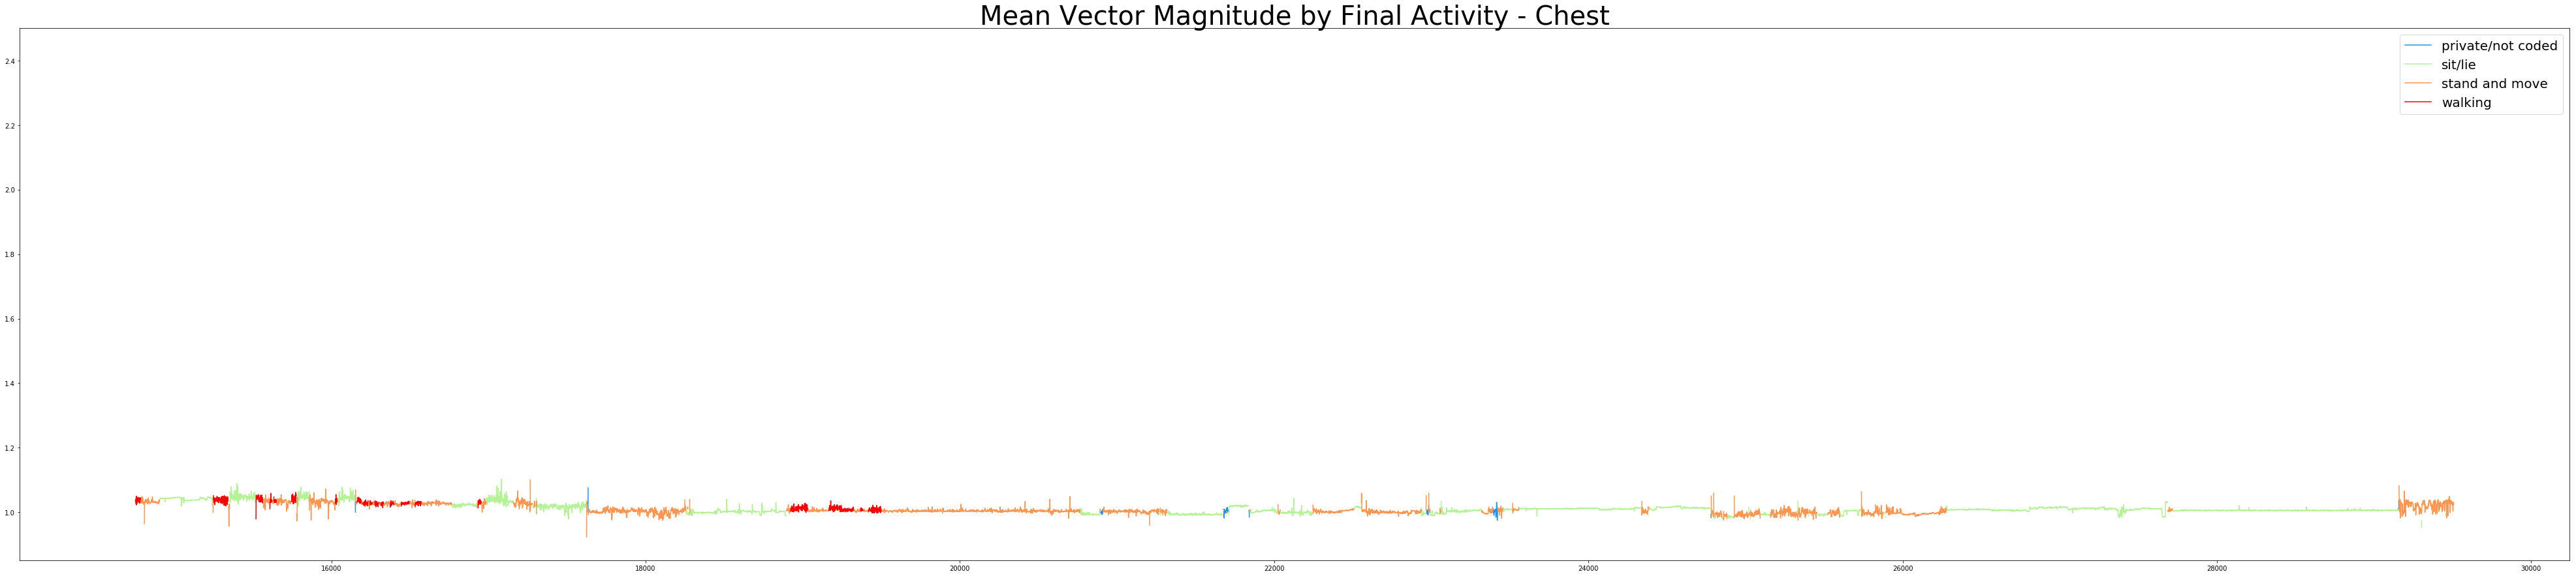

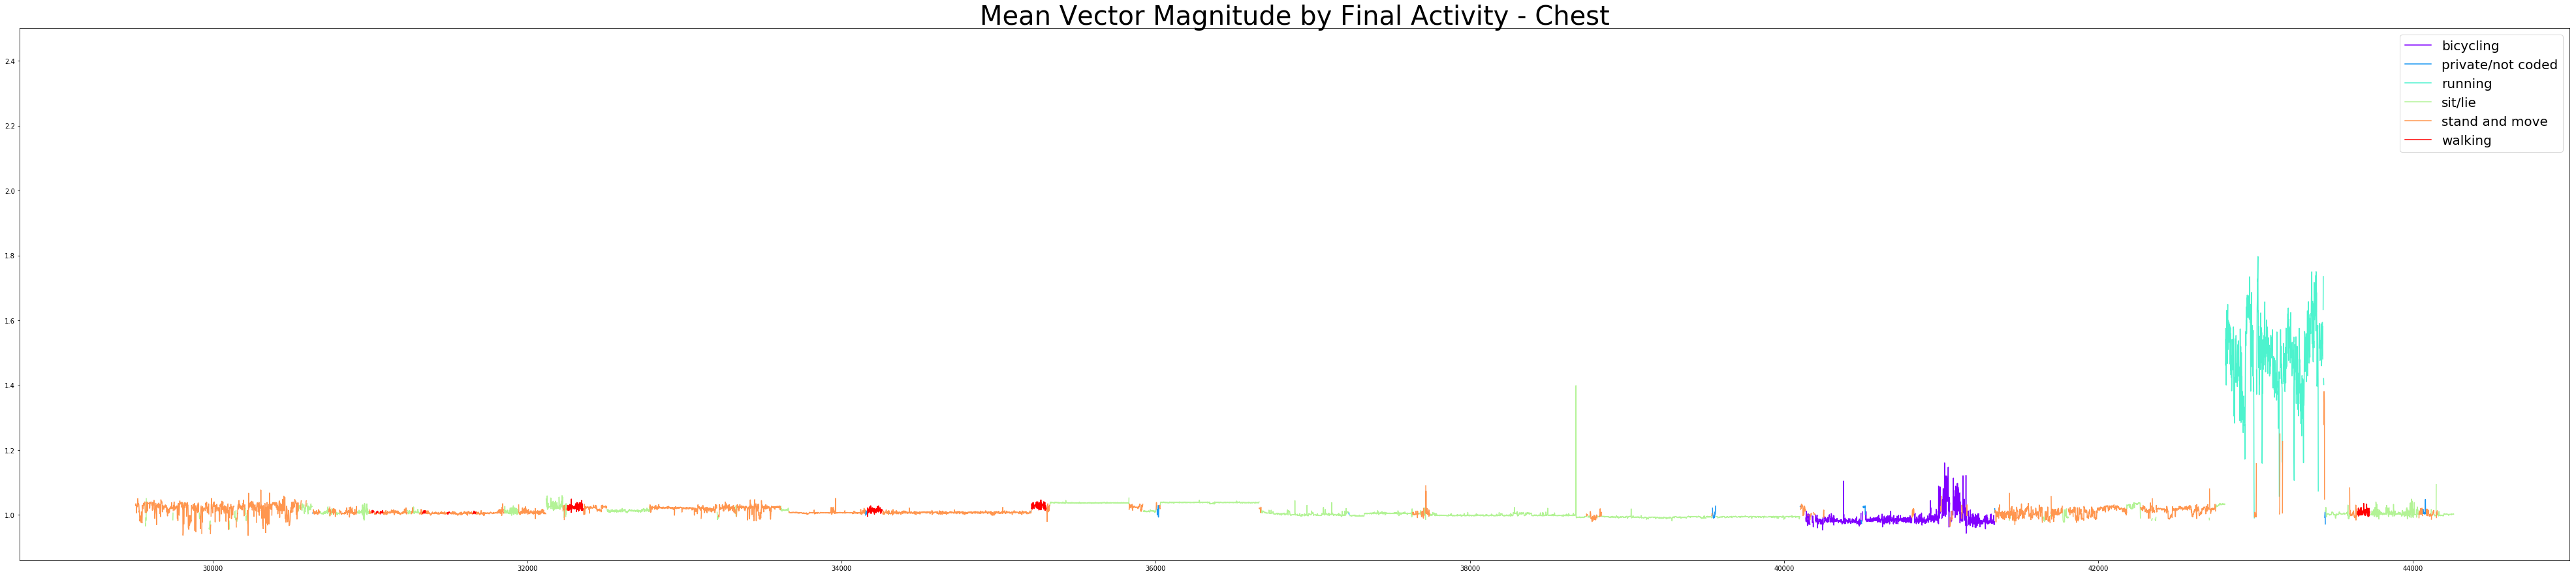

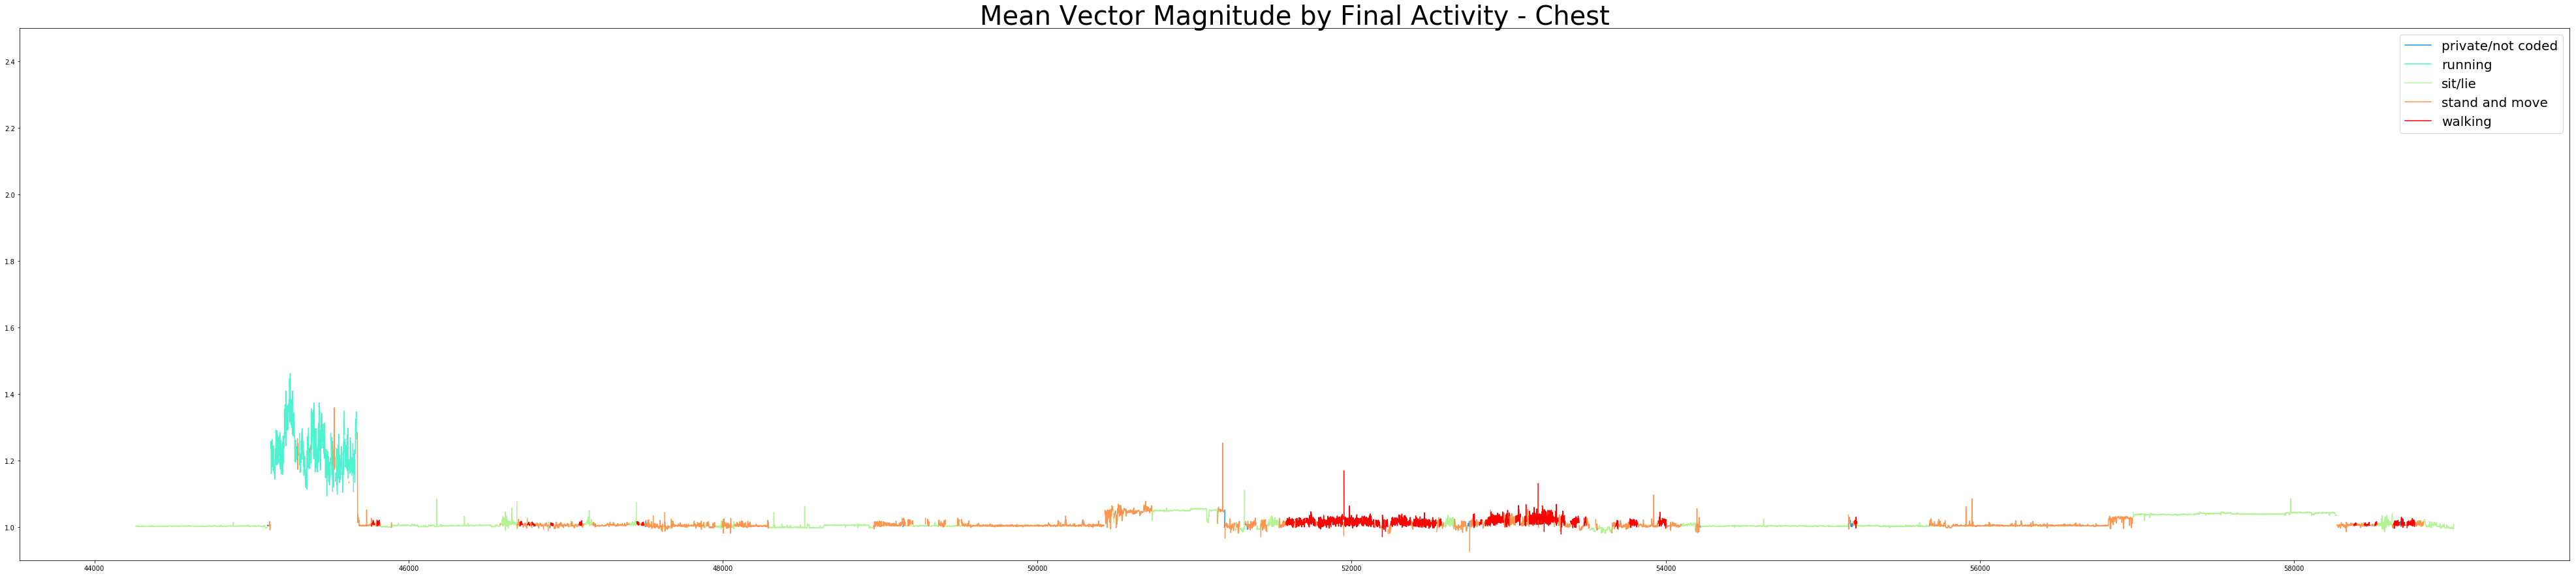

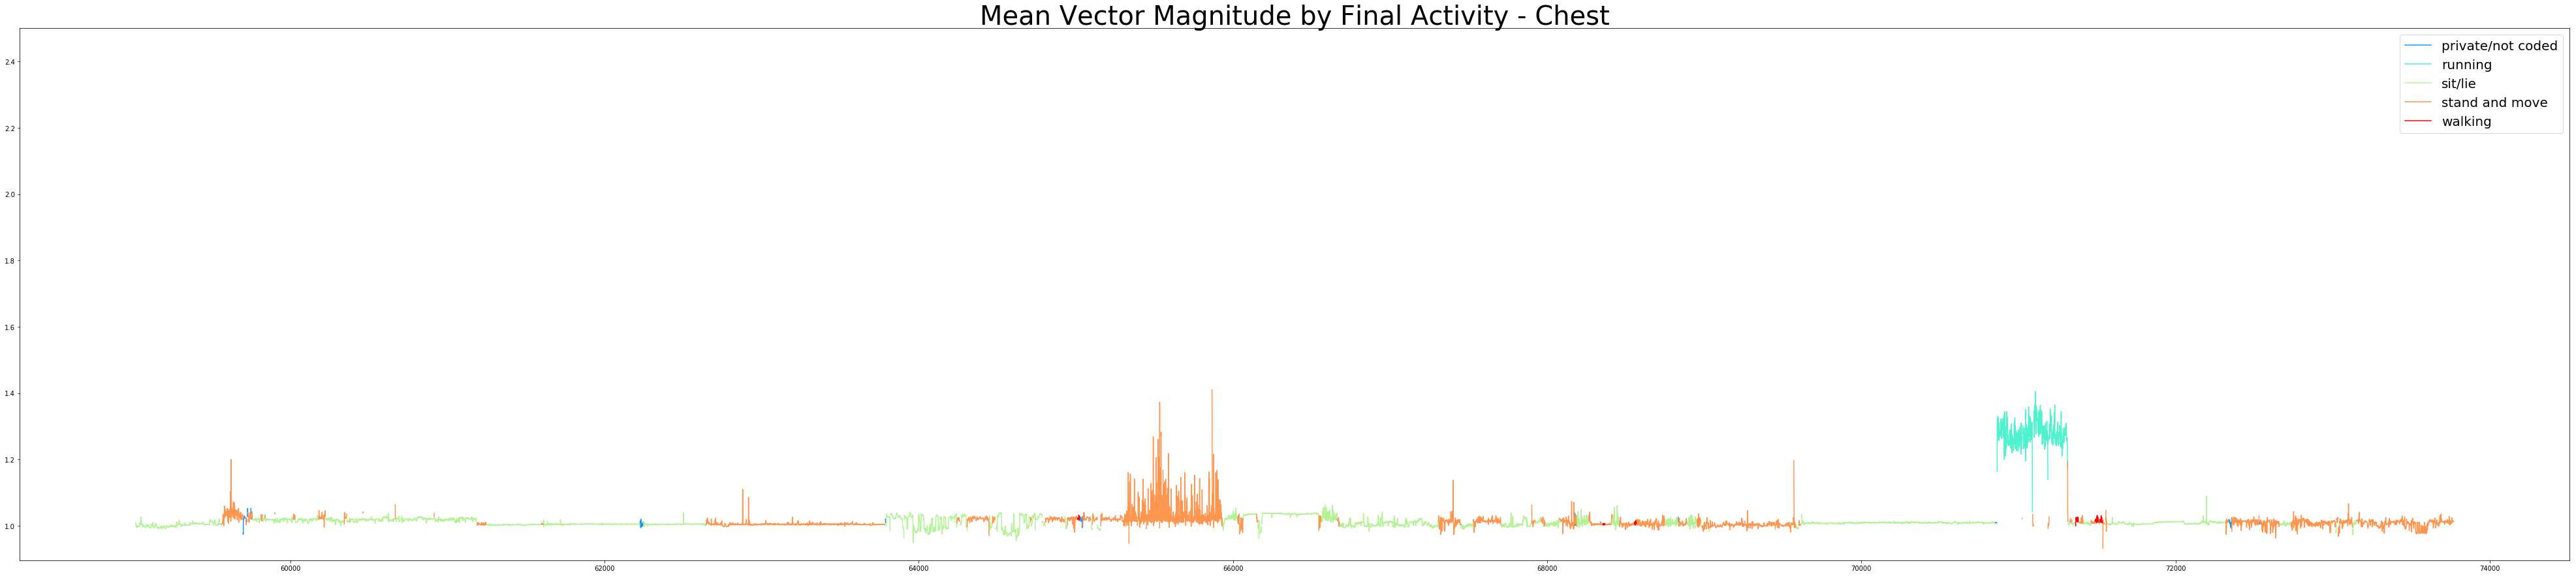

In [10]:
plot_all_data(chest, "Chest", "updated_final_activity", "Final Activity", "UpdatedFinalActivityGraphs")

# Plot Thigh Example

Description: plots a specific example in the thigh data that well demonstrates the separate updated_final_activities.

data - dataset (hip, wrist, thigh, or chest)


data_label - sensor you are using as a string for the title of the graph ("Hip", "Wrist", "Thigh", or "Chest")


column - activity encoding you are using as a string ("broad_activity", "detailed_activity", "updated_final_activity")


column_label - activity encoding string for use in title of graph ("Broad Activity", "Detailed Activity", "Final Activity")


folder - folder to save the graphs in (if you want to save the graph, edit the line specified in the function to come up with you own naming schema)

In [5]:
def plot_thigh_example(data, data_label, column, column_label, folder):
    unique_behaviors = np.unique(data[column])
    colors = cm.rainbow(np.linspace(0, 1, 6))
    color_dict = dict(zip(["bicycling","private/not coded", "running", "sit/lie", "stand and move", "walking"], colors))
    data = data.reset_index(drop = True)
    data1 = data.groupby([data.index // 1, column], as_index = False).count()
    data1['index'] = data1.index
    data2 = pd.DataFrame(data.groupby([data.index // 1, column], as_index=False).mean())
    print(data2.shape[0], len(list(data1[column])))
    if data2.shape[0] != len(list(data1[column])):
        data2 = data2.iloc[:data2.shape[0]-1,:]
    data2['index'] = data2.index
    data3 = data2[['index', column, 'mean.vm']]
    data3['color'] = [color_dict[behavior] for behavior in data3[column]]
    data6 = data2[data2.index < 10000]
    datasets = [data6]
    for i in range(len(datasets)):
        data = datasets[i]
        plt.subplots(figsize=(25,10))
        for behavior in np.unique(data[column]):
            dat = data.copy()
            dat.loc[dat[column] != behavior, "mean.vm"] = None
            if len(np.unique(dat["mean.vm"])) > 1:
                plt.plot(dat["index"],
                         dat["mean.vm"],
                         label = behavior, color = color_dict[behavior])
        plt.ylim(top = 3.5)
        plt.title("Mean Vector Magnitude by " + column_label +" - " + data_label, fontsize=30)
        plt.xlabel("Seconds", fontsize = 20)
        plt.ylabel("Mean Vector Magnitude", fontsize = 20) 
        plt.legend(loc = 'upper right', fontsize = 20) 
        # To change the naming schema edit the line below
        plt.savefig(folder + "/" + data_label.lower() + "_updated_final_activity_graph_" + str(i+1) + ".jpg") 
    
    pd.DataFrame(data.groupby([data.index // 5, column], as_index=False).mean())

13404 13404


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


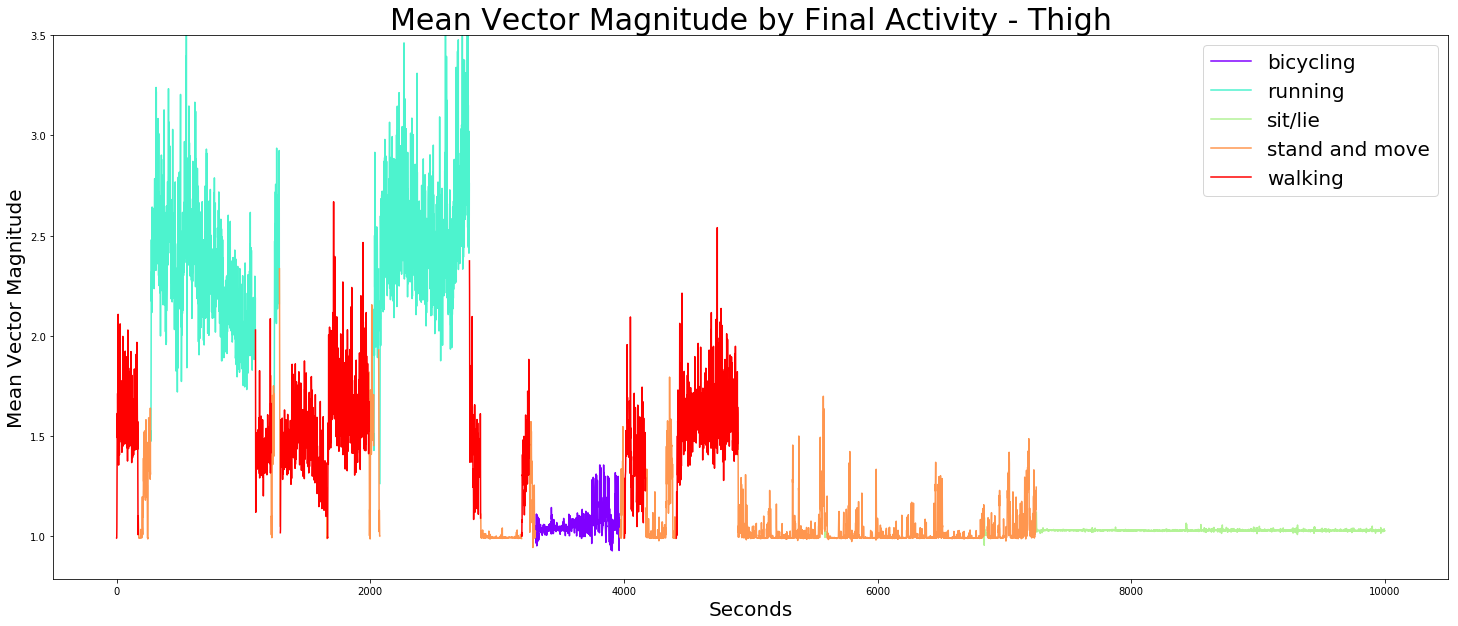

In [6]:
thighdat = thigh[[True if x in ['A-6','W-9'] else False for x in list(thigh.type)]]
plot_thigh_example(thighdat, "Thigh", "updated_final_activity", "Final Activity", "UpdatedFinalActivityGraphs")

# PCA

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
num_features = ['mean.x', 'std.x', 'min.x', 'max.x', 'mean.y', 'std.y', 'min.y', 'max.y', 'mean.z', 'std.z',
                'min.z', 'max.z', 'mean.vm', 'std.vm', 'pct25.vm', 'pct50.vm', 'pct75.vm', 'mean.ang', 'std.ang',
                'mean.xy', 'mean.xz', 'mean.yz', 'mean.xyz', 'xfft1', 'xfft2', 'xfft3', 'xfft4', 'xfft5', 'xfft6',
                'xfft7', 'xfft8', 'xfft9', 'xfft10', 'xfft11', 'xfft12', 'xfft13', 'xfft14', 'xfft15', 'yfft1',
                'yfft2', 'yfft3', 'yfft4', 'yfft5', 'yfft6', 'yfft7', 'yfft8', 'yfft9', 'yfft10', 'yfft11',
                'yfft12', 'yfft13', 'yfft14', 'yfft15', 'zfft1', 'zfft2', 'zfft3', 'zfft4', 'zfft5', 'zfft6',
                'zfft7', 'zfft8', 'zfft9', 'zfft10', 'zfft11', 'zfft12', 'zfft13', 'zfft14', 'zfft15', 'mfft1',
                'mfft2', 'mfft3', 'mfft4', 'mfft5', 'mfft6', 'mfft7', 'mfft8', 'mfft9', 'mfft10', 'mfft11',
                'mfft12', 'mfft13', 'mfft14', 'mfft15']
thigh2 = thigh.copy()
thigh2 = thigh2[num_features].apply(lambda x: (x - np.mean(x)) / np.std(x))
pca = PCA(n_components = 10)  
thigh["PC-1"] = pca.fit_transform(thigh2)
pca.explained_variance_ratio_

array([0.1608863 , 0.06239901, 0.05410867, 0.05031026, 0.04872299,
       0.04763679, 0.04566411, 0.04273178, 0.04191368, 0.03187358])

# Plot Thigh Example 2 (using PCA)

Description: plots a specific example in the thigh data that well demonstrates the separate updated_final_activities using the first PCA component rather than Mean Vector Magnitude.

data - dataset (hip, wrist, thigh, or chest)


data_label - sensor you are using as a string for the title of the graph ("Hip", "Wrist", "Thigh", or "Chest")


column - activity encoding you are using as a string ("broad_activity", "detailed_activity", "updated_final_activity")


column_label - activity encoding string for use in title of graph ("Broad Activity", "Detailed Activity", "Final Activity")


folder - folder to save the graphs in (if you want to save the graph, edit the line specified in the function to come up with you own naming schema)

In [14]:
def plot_thigh_example2(data, data_label, column, column_label, folder):
    unique_behaviors = np.unique(data[column])
    colors = cm.rainbow(np.linspace(0, 1, 6))
    color_dict = dict(zip(["bicycling","private/not coded", "running", "sit/lie", "stand and move", "walking"], colors))
    data = data.reset_index(drop = True)
    data1 = data.groupby([data.index // 1, column], as_index = False).count()
    data1['index'] = data1.index
    data2 = pd.DataFrame(data.groupby([data.index // 1, column], as_index=False).mean())
    print(data2.shape[0], len(list(data1[column])))
    if data2.shape[0] != len(list(data1[column])):
        data2 = data2.iloc[:data2.shape[0]-1,:]
    data2['index'] = data2.index
    data3 = data2[['index', column, 'PC-1']]
    data3['color'] = [color_dict[behavior] for behavior in data3[column]]
    data6 = data2[data2.index < 10000]
    datasets = [data6]
    for i in range(len(datasets)):
        data = datasets[i]
        plt.subplots(figsize=(15,5))
        for behavior in np.unique(data[column]):
            dat = data.copy()
            dat.loc[dat[column] != behavior, "PC-1"] = None
            if len(np.unique(dat["PC-1"])) > 1:
                plt.plot(dat["index"],
                         dat["PC-1"],
                         label = behavior, color = color_dict[behavior])
        plt.ylim(bottom = -3, top = 40)
        plt.title("Principal Component 1 by " + column_label +" - " + data_label, fontsize=20)
        plt.xlabel("Seconds", fontsize = 15)
        plt.ylabel("Principal Component 1", fontsize = 15)
        plt.legend(loc = 'upper right', fontsize = 15) 
        # To change the naming schema edit the line below
        plt.savefig(folder + "/" + data_label.lower() + "_updated_final_activity_graph_" + str(i+1) + ".jpg") 
    
    pd.DataFrame(data.groupby([data.index // 5, column], as_index=False).mean())

13404 13404


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


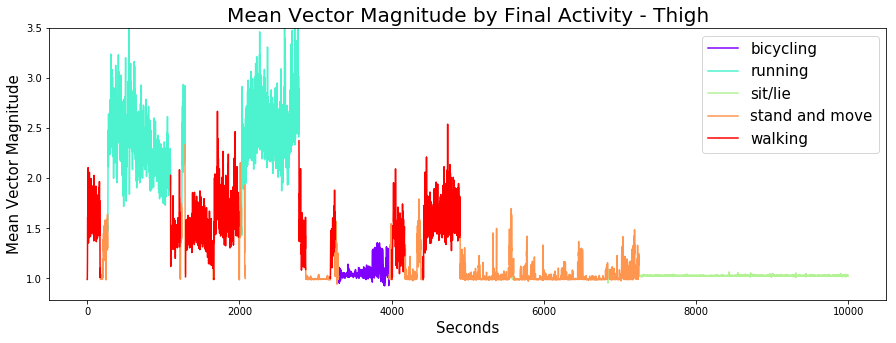

In [15]:
thighdat = thigh[[True if x in ['A-6','W-9'] else False for x in list(thigh.type)]]
plot_thigh_example2(thighdat, "Thigh", "updated_final_activity", "Final Activity", "UpdatedFinalActivityGraphs")

# Simple Correlation Plot

Description: example of how to make a simple correlation plot using the actual and predicted counts for each activity

In [8]:
actual = [180376, 132460, 33796, 9249, 6108]
predicted = [179666, 137291, 30474, 9558, 5000]
activity = ["sit/lie", "stand and move", "walking", "running",
           "bicycling"]
corr_data = pd.DataFrame()
corr_data["Actual"] = actual
corr_data["Predicted"] = predicted
corr_data["Activity"] = activity

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

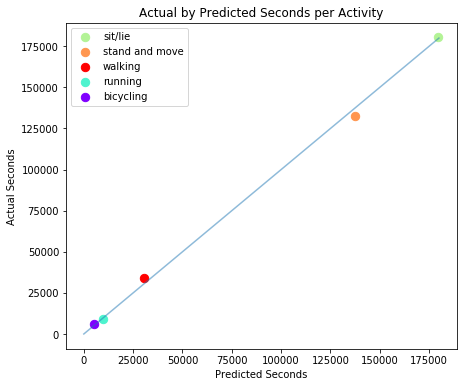

In [11]:
min_pred = 0
max_pred = max(predicted)
one_one_line = np.linspace(0, 180000, 5)
df = pd.DataFrame(one_one_line, columns = ['Predicted'])
df['Actual'] = one_one_line
df['pred'] = corr_data.Predicted
df['actual'] = corr_data.Actual
df['Activity'] = corr_data.Activity

colors = cm.rainbow(np.linspace(0, 1, 6))
color_dict = dict(zip(["bicycling","private/not coded", "running", "sit/lie", "stand and move", "walking"], colors))


fig, ax = plt.subplots(figsize=(7,6))
ax.scatter(x = df.pred[0], y = df.actual[0], c = color_dict[df.Activity[0]], label = df.Activity[0], s=70)
ax.scatter(x = df.pred[1], y = df.actual[1], c = color_dict[df.Activity[1]], label = df.Activity[1], s=70)
ax.scatter(x = df.pred[2], y = df.actual[2], c = color_dict[df.Activity[2]], label = df.Activity[2], s=70)
ax.scatter(x = df.pred[3], y = df.actual[3], c = color_dict[df.Activity[3]], label = df.Activity[3], s=70)
ax.scatter(x = df.pred[4], y = df.actual[4], c = color_dict[df.Activity[4]], label = df.Activity[4], s=70)
ax.set_xlabel("Predicted Seconds")
ax.set_ylabel("Actual Seconds")
ax.set_title("Actual by Predicted Seconds per Activity")
ax.legend()
ax.plot(df.Actual, df.Predicted, alpha=0.5)
# plt.savefig("CorrelationPlots/CorrelationPlot_Segmentation_Thigh.jpg") 
plt.show()